In [55]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


from sklearn.metrics import f1_score, roc_curve, auc
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import export_graphviz

import graphviz


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('SCALE불량.csv', engine='python', encoding='euc-kr')
df.drop(['PLATE_NO','ROLLING_DATE'], axis=1, inplace=True)

df['SCALE'].replace('양품',0,inplace=True)
df['SCALE'].replace('불량',1,inplace=True)
df.head()

df['HSB'].replace('미적용',0,inplace=True)
df['HSB'].replace('적용',1,inplace=True)
df.head()

df_raw=df


df_raw.loc[df_raw['ROLLING_TEMP_T5']==0, "ROLLING_TEMP_T5"]=np.nan
#압연온도가 0도인 것은 이상치인것으로 볼 수 있다. 0인 데이터 6개. 723도는 박스를 벗어나있지만 큰 차이 없어 바꾸지 않겠음.
df_raw["ROLLING_TEMP_T5"].fillna(df_raw['ROLLING_TEMP_T5'].mean(), inplace=True)


df_raw.drop(['FUR_EXTEMP'], axis=1, inplace=True)

df_raw["STEEL_C"] = 0
for i in range(len(df_raw)):
    df_raw["STEEL_C"].iloc[i] = np.where(df_raw["STEEL_KIND"][i][0] == "C", 1, 0)
df_raw.head()



/home/pirl/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,STEEL_C
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,934.0,1,8,2조,0
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,937.0,1,8,2조,0
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,889.0,1,8,3조,0
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,885.0,1,8,3조,0
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,873.0,1,8,1조,0


In [27]:
df2=df_raw


In [32]:
#영향력 적은 'FUR_HZ_TEMP','STEEL_KIND','SPEC','PT_WDTH','FUR_NO','FUR_NO_ROW','FUR_HZ_TIME','FUR_TIME'
df2=df_raw.drop(['STEEL_KIND','SPEC','FUR_NO','FUR_NO_ROW','PT_LTH','PT_WGT','PT_WDTH','FUR_TIME'], axis=1, inplace=False)

In [33]:
df2.head()

,SCALE,PT_THK,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,STEEL_C
0,0,32.25,1144,116,1133,59,934.0,1,8,2조,0
1,0,32.25,1144,122,1135,53,937.0,1,8,2조,0
2,0,33.27,1129,116,1121,55,889.0,1,8,3조,0
3,0,33.27,1152,125,1127,68,885.0,1,8,3조,0
4,0,38.33,1140,134,1128,48,873.0,1,8,1조,0


In [34]:

df_train,df_test=train_test_split(df2,test_size=0.2,random_state=1234)
print("train data size:{}".format(df_train.shape))

print("test data  size:{}".format(df_test.shape))

train data size:(576, 11)
test data  size:(144, 11)


In [20]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR,STEEL_C
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,934.0,1,8,2조,0
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,937.0,1,8,2조,0
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,889.0,1,8,3조,0
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,885.0,1,8,3조,0
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,873.0,1,8,1조,0


In [45]:
#'PT_LTH','PT_WGT','FUR_HZ_TEMP''PT_WDTH',STEEL_KIND,FUR_HZ_TIME,FUR_TIME+
#PT_LTH, PT_WGT는 진짜낮아!!
log_model=Logit.from_formula('''SCALE~PT_THK++FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+ROLLING_TEMP_T5+HSB+ROLLING_DESCALING+C(WORK_GR)+STEEL_C''', data=df_train)

log_result=log_model.fit()
print(log_result.summary())
#log_result=log_model.fit(method = "bfgs")

         Current function value: 0.271208
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  576
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.5680
Time:                        03:31:32   Log-Likelihood:                -156.22
converged:                      False   LL-Null:                       -361.59
Covariance Type:            nonrobust   LLR p-value:                 2.006e-80
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -71.8176   1.71e+04     -0.004      0.997   -3.37e+04    3.35e+04
C(WORK_GR)[T.2조]     -1.0196      0.415     

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
'''SCALE~PT_THK++FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+ROLLING_TEMP_T5+HSB+ROLLING_DESCALING+C(WORK_GR)+STEEL_C'''

In [48]:
y_pred=log_result.predict(df_test)

y_pred_class=(y_pred>0.5).astype(int)
y_pred_class.head()

146    1
131    1
650    0
613    1
355    0
dtype: int64

In [49]:
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_test['SCALE'],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test['SCALE'],y_pred_class)))

Accuracy:0.861

Confusion Matrix:
[[85 13]
 [ 7 39]]


In [50]:
df_char=df_raw.select_dtypes(include='object')
df_numeric=df_raw.select_dtypes(exclude='object')
df_char

,SPEC,STEEL_KIND,FUR_NO,WORK_GR
0,AB/EH32-TM,T1,1호기,2조
1,AB/EH32-TM,T1,1호기,2조
2,NV-E36-TM,T8,2호기,3조
3,NV-E36-TM,T8,2호기,3조
4,BV-EH36-TM,T8,3호기,1조
...,...,...,...,...
715,NK-KA,C0,3호기,2조
716,NV-A32,C0,2호기,1조
717,NV-A32,C0,2호기,4조
718,LR-A,C0,3호기,2조


In [51]:
df_numeric

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,STEEL_C
0,0,32.25,3707,15109,14180,1,1144,116,1133,59,282,934.0,1,8,0
1,0,32.25,3707,15109,14180,2,1144,122,1135,53,283,937.0,1,8,0
2,0,33.27,3619,19181,18130,1,1129,116,1121,55,282,889.0,1,8,0
3,0,33.27,3619,19181,18130,2,1152,125,1127,68,316,885.0,1,8,0
4,0,38.33,3098,13334,12430,1,1140,134,1128,48,314,873.0,1,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,20.14,3580,38639,21870,1,1172,72,1164,62,245,1005.0,1,8,1
716,0,15.08,3212,48233,18340,1,1150,61,1169,61,238,947.0,1,10,1
717,0,16.60,3441,43688,19590,2,1169,65,1163,77,247,948.0,1,10,1
718,0,15.59,3363,48740,80240,2,1179,86,1163,45,243,940.0,1,10,1


In [60]:
scaler=StandardScaler()
df_numeric=df_raw[['PT_THK','PT_WDTH','PT_LTH','PT_WGT','FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','ROLLING_TEMP_T5']]
np_numeric_scaled=scaler.fit_transform(df_numeric)
df_numeric_scaled=pd.DataFrame(np_numeric_scaled,columns=df_numeric.columns)

df_char=df_raw.drop(['PT_THK','PT_WDTH','PT_LTH','PT_WGT','FUR_HZ_TEMP','FUR_HZ_TIME','FUR_SZ_TEMP','FUR_SZ_TIME','FUR_TIME','ROLLING_TEMP_T5'],axis=1)

df_scaled=pd.concat([df_numeric_scaled,df_char],axis=1)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,SCALE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,ROLLING_DESCALING,WORK_GR,STEEL_C
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.118627,0,AB/EH32-TM,T1,1호기,1,1,8,2조,0
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.072819,0,AB/EH32-TM,T1,1호기,2,1,8,2조,0
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-0.805752,0,NV-E36-TM,T8,2호기,1,1,8,3조,0
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-0.866829,0,NV-E36-TM,T8,2호기,2,1,8,3조,0
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.050063,0,BV-EH36-TM,T8,3호기,1,1,8,1조,0


In [61]:
df_scaled["SCALE"]=np.where(df_scaled['SCALE']>0,1,0)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,ROLLING_TEMP_T5,SCALE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,ROLLING_DESCALING,WORK_GR,STEEL_C
0,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.118627,0,AB/EH32-TM,T1,1호기,1,1,8,2조,0
1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.072819,0,AB/EH32-TM,T1,1호기,2,1,8,2조,0
2,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-0.805752,0,NV-E36-TM,T8,2호기,1,1,8,3조,0
3,0.209106,1.568896,-1.095771,-0.944112,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-0.866829,0,NV-E36-TM,T8,2호기,2,1,8,3조,0
4,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.050063,0,BV-EH36-TM,T8,3호기,1,1,8,1조,0


In [62]:
df_scaled_train,df_scaled_test=train_test_split(df_scaled,test_size=0.3,random_state=1234)

In [63]:
scaled_log_model=Logit.from_formula('''SCALE~PT_THK++FUR_HZ_TEMP+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+ROLLING_TEMP_T5+HSB+ROLLING_DESCALING+C(WORK_GR)+STEEL_C''',df_scaled_train)

scaled_log_result=scaled_log_model.fit()

print(scaled_log_result.summary())

         Current function value: 0.266442
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      491
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Feb 2020   Pseudo R-squ.:                  0.5737
Time:                        03:45:14   Log-Likelihood:                -134.29
converged:                      False   LL-Null:                       -314.97
Covariance Type:            nonrobust   LLR p-value:                 5.596e-70
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            35.5609   1.89e+04      0.002      0.999   -3.71e+04    3.72e+04
C(WORK_GR)[T.2조]     -0.7717      0.438     

/home/pirl/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


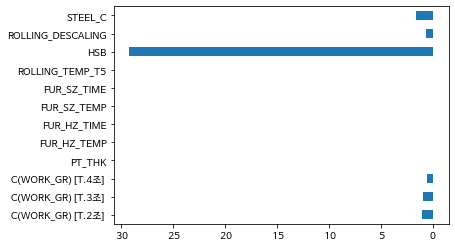

In [64]:
df_log_scaled_coef=pd.DataFrame({'Coef':log_result.params.values[1:]}, index=scaled_log_model.exog_names[1:])
df_log_scaled_coef.plot.barh(y='Coef',legend=False)

In [67]:
y_pred=log_result.predict(df_scaled_test)

y_pred_class=(y_pred>0.5).astype(int)
y_pred_class.head()

146    0
131    0
650    0
613    0
355    0
dtype: int64

In [69]:
print("Accuracy:{0:.3f}\n".format(accuracy_score(df_scaled_test['SCALE'],y_pred_class)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_scaled_test['SCALE'],y_pred_class)))

Accuracy:0.671

Confusion Matrix:
[[145   0]
 [ 71   0]]
